In [1]:
# Importing required libraries and modules
import numpy as np
import pandas as pd
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import to_categorical

In [2]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

num_classes = 10

# Flatten the data to 4 dimensions: samples, width, height, features
train_images = train_images.reshape(train_images.shape[0], 32, 32, 3)
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape(test_images.shape[0], 32, 32, 3)
test_images = test_images.astype('float32') / 255

# One hot encode the labels
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

In [3]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(32, 32, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [4]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [5]:
batch_size = 128

model.fit(train_images, train_labels,
          batch_size=batch_size,
          epochs=20,
          verbose=1,
          validation_data=(test_images, test_labels))

Epoch 1/20
391/391 [==============================] - 14s 23ms/step - loss: 1.6819 - accuracy: 0.3874 - val_loss: 1.3042 - val_accuracy: 0.5459
Epoch 2/20
391/391 [==============================] - 7s 18ms/step - loss: 1.3280 - accuracy: 0.5282 - val_loss: 1.1079 - val_accuracy: 0.6207
Epoch 3/20
391/391 [==============================] - 6s 16ms/step - loss: 1.1890 - accuracy: 0.5778 - val_loss: 1.0326 - val_accuracy: 0.6446
Epoch 4/20
391/391 [==============================] - 5s 12ms/step - loss: 1.1015 - accuracy: 0.6092 - val_loss: 0.9700 - val_accuracy: 0.6621
Epoch 5/20
391/391 [==============================] - 5s 13ms/step - loss: 1.0445 - accuracy: 0.6277 - val_loss: 0.9447 - val_accuracy: 0.6745
Epoch 6/20
391/391 [==============================] - 5s 12ms/step - loss: 0.9930 - accuracy: 0.6486 - val_loss: 0.9347 - val_accuracy: 0.6755
Epoch 7/20
391/391 [==============================] - 5s 12ms/step - loss: 0.9479 - accuracy: 0.6626 - val_loss: 0.9079 - val_accuracy: 0.686

In [6]:
# Assuming that test_images contains the data you want to use for prediction
predictions = model.predict(test_images)
Results = model.evaluate(test_images, test_labels, batch_size=batch_size)
print("Testing Results:", Results)

79/79 [==============================] - 0s 5ms/step - loss: 0.8844 - accuracy: 0.7068
Testing Results: [0.8844407200813293, 0.7067999839782715]


In [7]:
predictions_train = model.predict(train_images)
Results = model.evaluate(train_images, train_labels)
print("Training Results:", Results)

1563/1563 [==============================] - 5s 3ms/step - loss: 0.3344 - accuracy: 0.9061
Training Results: [0.33444735407829285, 0.9061200022697449]


In [8]:
predictions[1]

array([1.8990700e-03, 1.7876151e-01, 1.1856915e-09, 2.8110855e-10,
       1.0656533e-11, 2.2617233e-14, 2.7371031e-14, 3.3971313e-12,
       8.1933844e-01, 1.0085898e-06], dtype=float32)

### Test Confusion Matrix :

<Axes: >

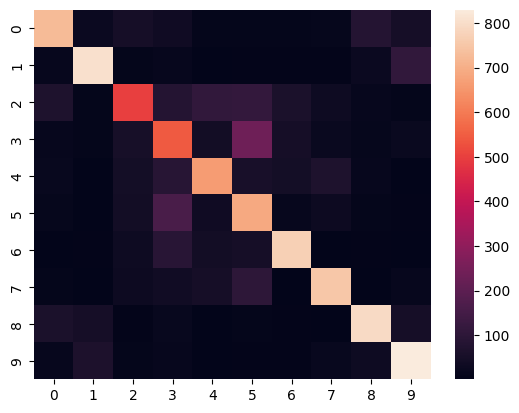

In [9]:
import seaborn as sns
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(test_labels.argmax(axis=1), predictions.argmax(axis=1))
sns.heatmap(confusion_matrix)

### Train Confusion Matrix

<Axes: >

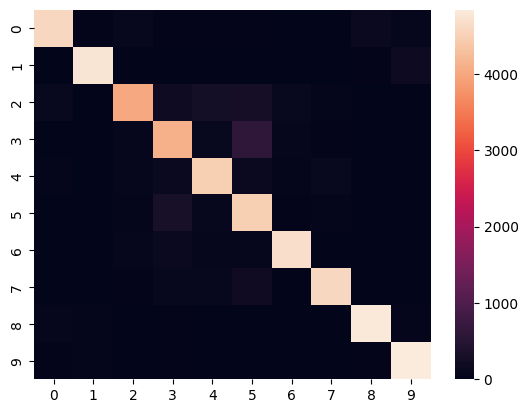

In [10]:
confusion_matrix = metrics.confusion_matrix(train_labels.argmax(axis=1), predictions_train.argmax(axis=1))
sns.heatmap(confusion_matrix)